# Data Preparation

# Inhouds opgaven  data preparation

## 1. Libraries
## 2. Data Import
## 3. Data retrieve
## 4. Kolommen selecteren
## 5. Duplicaten verwijderen
## 6. Na waardes
## 7. Dtypes omzetten
## 8. Prognose aanpasing
## 9. Duur kolommen aanmaken en aanpassen
## 10. Target encoding


## 1. Libraries

Hier importeren we de benodigde libraries voor het aanpassen van de data voor de modellen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import LeaveOneOutEncoder

## 2. Data import

We laden de data van het csv bestand in zonder de Nvt

In [2]:
cols = list(pd.read_csv("sap_storing_data_hu_project.csv", nrows =1))
exclusion_list = ['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt','stm_mon_toelichting_trdl','stm_oh_pg_mld', 'stm_scenario_mon','stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode','stm_progfh_gw_datum','stm_progfh_gw_lwd_datum','stm_progfh_gw_lwd_tijd','stm_progfh_gw_duur','stm_mon_nr_status_wijzdd', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst','stm_progfh_in_ddt','stm_progfh_in_invoer_ddt','stm_progfh_gw_ddt','stm_progfh_gw_lwd_ddt','stm_progfh_hz','stm_veroorz_groep','stm_veroorz_code','stm_veroorz_tekst_kort','stm_effect', 'stm_afspr_aanvangddt','stm_mon_eind_ddt','stm_mon_vhdsincident','stm_dir_betrok_tr','stm_aangelegd_dd','stm_aangelegd_tijd','stm_mon_begindatum','stm_mon_begintijd','stm_afspr_aanvangdd','stm_afspr_aanvangtijd','stm_afspr_aanvangtijd','stm_mon_eind_tijd','stm_controle_dd','stm_akkoord_mon_toewijz','stm_status_sapnaarmon','stm_fact_jn','stm_akkoord_melding_jn','stm_afsluit_ddt','stm_afsluit_dd','stm_afsluit_tijd','stm_rec_toegev_ddt','stm_hinderwaarde','stm_actie','stm_standplaats','stm_status_gebr','stm_wbi_nummer','stm_projnr','stm_historie_toelichting','stm_schade_verhaalb_jn','stm_schadenr','stm_schade_status_ga','stm_schade_statusdatum','stm_relatiervo_vorig','stm_relatiervo_volgend','stm_relatiervo','stm_afspr_func_hersteldd','stm_afspr_func_hersteltijd','stm_sorteerveld','stm_rapportage_maand','stm_rapportage_jaar','stm_x_bron_publ_dt','stm_x_bron_bestandsnaam','stm_x_bron_arch_dt','stm_x_actueel_ind','stm_x_run_id','stm_x_bk','stm_x_start_sessie_dt','stm_x_vervallen_ind']
original_table = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False, usecols=[i for i in cols if i not in exclusion_list])

## 3. Data retrieve

Functie voor het ophalen van de data voor modeling.

In [3]:
def return_model_data():
    return [table, equipm_soort_encoder]

## 4. Kolommen selecteren

Hier onder worden bepaalde kolommen verwijdert uit de dataset voor memory gebruik en daarnaast ook de relevantie voor het model. Er wordt in business understanding duidelijker uitgelegd waarom we deze kolommen verwijderen en of aanpassen.

We verwijderen eerst de kolommen die geen goede data bevatten.

In [4]:
table = original_table.copy(deep=True).drop(['stm_sap_meldtekst_lang', 'stm_sap_meldtekst', 'stm_oorz_tkst', 'stm_oorz_tekst_kort', 'stm_equipm_omschr_mld', 'stm_equipm_omschr_gst', 'Unnamed: 0', 'stm_geo_gst_uit_functiepl', 'stm_functiepl_gst', 'stm_arbeid', 'stm_evb'], axis=1)

Daarna verwijderen we de kolommen die duplicaat informatie bevat.

In [5]:
table = table.drop(['stm_sap_melddatum', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd', 'stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum'], axis=1)

We verwijderen vervolgens de kolommen waar te veel na's in staan of te weinig informatie bevatten.

In [6]:
table = table.drop(['stm_tao_indicator_vorige', 'stm_pplg_naar', 'stm_tao_soort_mutatie', 'stm_pplg_van', 'stm_dstrglp_van', 'stm_dstrglp_naar'], axis=1)

Hier na verwijderen we de kolommen die informatie bevat die inrelevant is voor het model

In [7]:
table = table.drop(['stm_vl_post', 'stm_mon_nr'], axis=1)

## 5. Duplicaten verwijderen

De rijen in de data bevatten duplicaten van dezelfde melding. Die meldingen worden hier verwijdert op de last occurence omdat het laatste item de laatste verandering is in de melding

In [8]:
table[table.duplicated('#stm_sap_meldnr', keep = False)].sort_values(by=['#stm_sap_meldnr']).head(4)

,#stm_sap_meldnr,stm_sap_meld_ddt,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,...,stm_tao_beinvloedbaar_indicator,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_techn_gst,stm_progfh_in_duur,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
34729,50117070,10/01/2013 11:07:00,2.0,2.0,NaN,NaN,0.0,0.0,9.0,MAFS,...,NB,NaN,002,NaN,37.0,B,99999999,0.0,0.0,99999999.0
34730,50117070,10/01/2013 11:07:00,2.0,2.0,NaN,NaN,0.0,0.0,9.0,MAFS,...,NB,NaN,002,NaN,37.0,B,99999999,0.0,0.0,99999999.0
34731,50117071,10/01/2013 17:18:00,17.0,17.0,NaN,NaN,44500.0,45300.0,9.0,MAFS,...,NB,NaN,017,NaN,29.0,B,99999999,0.0,0.0,99999999.0
34732,50117071,10/01/2013 17:18:00,17.0,17.0,NaN,NaN,44500.0,45300.0,9.0,MAFS,...,NB,NaN,017,NaN,29.0,B,99999999,0.0,0.0,99999999.0


In [9]:
table.drop_duplicates(subset=['#stm_sap_meldnr'],inplace=True, keep='last')
print(table.shape)

(566481, 34)


## 6. Na waardes

Vervolgens veranderen we de Na waardes van de kolommen die gebruikt gaan worden naar None. Hier wordt dieper op in gegaan in business understanding.

In [10]:
table['stm_equipm_soort_gst'] = table['stm_equipm_soort_gst'].fillna('None')
table['stm_equipm_nr_gst'] = table['stm_equipm_nr_gst'].fillna('None')
table['stm_geo_gst'] = table['stm_geo_gst'].fillna('None')
table['stm_contractgeb_mld'] = table['stm_contractgeb_mld'].fillna('None')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna('None')
table['stm_techn_mld'] = table['stm_techn_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna(0)

## 7. Dtypes omzetten

Hier onder veranderen we de kolommen naar de bijbehorende types voor de modellen.

In [11]:
table['stm_aanntpl_ddt'] = pd.to_datetime(table['stm_aanntpl_ddt'], errors='coerce', dayfirst=True, infer_datetime_format=True)
table['stm_aanngeb_ddt'] = pd.to_datetime(table['stm_aanngeb_ddt'], errors='coerce', dayfirst=True, infer_datetime_format=True)
table['stm_sap_meld_ddt'] = pd.to_datetime(table['stm_sap_meld_ddt'], errors='coerce', dayfirst=True,infer_datetime_format=True)

table['stm_aanntpl_ddt'] = table['stm_aanntpl_ddt'].fillna(table['stm_sap_meld_ddt'])

table['stm_fh_duur'] =  pd.to_numeric(table['stm_fh_duur'], errors='coerce')
table['stm_progfh_in_duur'] =  pd.to_numeric(table['stm_progfh_in_duur'], errors='coerce')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].astype('category')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].astype('category')


## 8. Functieherstel en Prognose filtering
(aangepast door Levi Verhoef)

We verwijderen een aantal soorten prognoses en functieherstel tijden. We kijken alleen naar functieherstel met lengte tussen de 5 minuten en 6 uur. Functiehersteltijden van onder de 5 minuten lijken mij oninteressant om te analyseren, omdat het veelal ruis betreft. Er waren bijvoorbeeld veel datapunten met een functieherstel duur van 1 minuut. Dat zal nauwelijks tot vertraging leiden en dus niets bijdragen aan de wens van de opdrachtgever.

De andere kant van het spectrum hebben we 6 uur als uiterste genomen omdat functieherstellen die zo lang duren vaak voor de monteurs ook onvoorspelbaar zijn, en een onvoorspelbare aard hebben. Het is voor dit project vooral interessant om voorspelbare situaties te analyseren.

In [12]:
table = table[table['stm_fh_duur'] > 5]
table = table[table['stm_fh_duur'] <= 360]

table = table[table['stm_progfh_in_duur'] <= 360]
table = table[table['stm_progfh_in_duur'] > 5]

## 9. Duur kolommen aanmaken en aanpassen

Door de datetime kolommen kan er een duur bepaald worden tussen tijden. Hieronder wordt die tijd aangemaakt en aangepast als er foutieve data in voorkomt.

In [13]:
table['stm_meld_gebeld_duur'] = (table['stm_aanngeb_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')
table['stm_meld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')

#vanaf gebeld tot ter plaatse
table['stm_gebeld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_aanngeb_ddt']).astype('timedelta64[m]')
table.loc[(table['stm_meld_gebeld_duur'] < 0), 'stm_meld_gebeld_duur'] = 0
table.loc[(table['stm_meld_ter_plekken_duur'] < 0), 'stm_meld_ter_plekken_duur'] = 0
table.loc[(table['stm_gebeld_ter_plekken_duur'] < 0), 'stm_gebeld_ter_plekken_duur'] = 0

table['stm_meld_gebeld_duur'] = table['stm_meld_gebeld_duur'].fillna(0)
table['stm_meld_ter_plekken_duur'] = table['stm_meld_ter_plekken_duur'].fillna(0)
table['stm_gebeld_ter_plekken_duur'] = table['stm_gebeld_ter_plekken_duur'].fillna(0)

table = table[table['stm_gebeld_ter_plekken_duur'] < 1000]
value_counts = table['stm_equipm_soort_mld'].value_counts()  
table['stm_equipm_soort_mld'].replace((value_counts[value_counts <= 1].index), np.nan, inplace=True)

## 10. Target encoding

Voor de kolommen die gekozen zijn als feature worden hier twee kolommen omgezet naar de leave one out encoder. In business understanding wordt dit verder uitgelegd.

In [37]:
equipm_soort_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_equipm_soort_mld_looe_mean'] = equipm_soort_encoder.fit_transform(table['stm_equipm_soort_mld'].astype('category'), table['stm_fh_duur'])

tech_soort_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_techn_mld_looe_mean'] = tech_soort_encoder.fit_transform(table['stm_techn_mld'].astype('category'), table['stm_fh_duur'])

In [38]:
table[['stm_techn_mld_looe_mean', 'stm_techn_mld_looe_mean']]

,stm_techn_mld_looe_mean,stm_techn_mld_looe_mean
32099,129.260463,129.260463
91875,121.491915,121.491915
99101,130.842291,130.842291
139804,119.804532,119.804532
139806,117.997754,117.997754
...,...,...
898496,121.182160,121.182160
898507,125.358937,125.358937
898521,118.215635,118.215635
898523,114.289710,114.289710


<h1> Pessimisme target </h1>
(door Levi Verhoef)

Vanuit prorail werd gecommuniceerd dat monteurs algemeen gesproken een functiehersteltijd negatief inschatten. Ze zijn liever pessimistisch over het herstellen van de functionaliteit omdat er op een te korte prognose een boete staat.

We willen dit pessimisme van de monteurs proberen in kaart te brengen. Hiervoor willen we de prognose van de monteurs vergelijken met de daadwerkelijke functiehersteltijd.

We maken twee nieuwe kolommen aan waarin pessisme zowel in minuten als in percentage staat aangegeven. 

In [40]:
table['pessimism_minutes'] = table['stm_progfh_in_duur'] - table['stm_fh_duur']
table['pessimism_percentage'] = (table['pessimism_minutes'] / table['stm_fh_duur']) * 100

table['pessimism_minutes'].mean()

-44.0196166854566

Interessant genoeg komen we hier achter een verkeerde aanname van prorail:

Monteurs zijn gemiddeld genomen helemaal niet pessimistisch. De prognose is gemiddeld gezien meer dan een uur te kort. De aanname was dat prorail monteurs over het algemeen het herstel langer inschatten omdat zij een boete riskeren wanneer ze dat niet doen, maar het blijkt dat hun prognoses, gemiddeld genomen, 17% te laag zijn:

In [41]:
table['pessimism_percentage'].mean()

-17.06402151318975

De gemiddeldes voor pesismisme zien er zo uit:

C:\Users\Levi\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


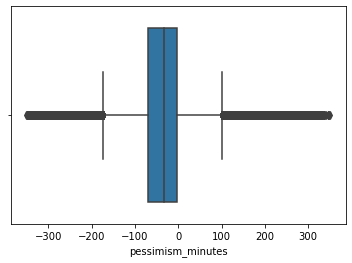

In [22]:
sns.boxplot(table['pessimism_minutes'])
plt.show()

C:\Users\Levi\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


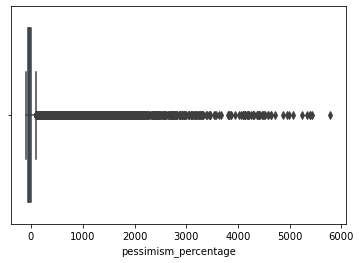

In [23]:
sns.boxplot(table['pessimism_percentage'])
plt.show()

Zoals je kunt aflezen, zien zowel de boxplots voor pessimisme in minuten als pessimisme in percentages er niet erg pessimistisch uit. negatieve waardes voor pessimisme in minuten betekend in feite optimisime, en bij percentages zien we dat er veel excorbitante percentages bij zitten.

Ondanks deze opvallende resultaten, is het toch interessant of we pessimisme kunnen voorspellen. Wellicht dat we in plaats van pessimisme eerder naar optimisme willen kijken?